## 1. Introduction to Baby Names Data
<blockquote>
  <p>What’s in a name? That which we call a rose, By any other name would smell as sweet.</p>
</blockquote>
<p>In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. </p>
<p>Let us start by reading the data.</p>

In [1]:
# Import modules
import pandas as pd

# Read names into a dataframe: bnames
bnames = pd.read_csv('datasets/names.csv.gz')
print(bnames.head())

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


In [2]:
%%nose
def test_bnames_exists():
    """bnames is defined."""
    assert 'bnames' in globals(), "You should have defined a variable named bnames"
# bnames is a dataframe with 1891894 rows and 4 columns
def test_bnames_dataframe():
    """bnames is a DataFrame with 1891894 rows and 4 columns"""
    import pandas as pd
    assert isinstance(bnames, pd.DataFrame)
    assert bnames.shape[0] == 1891894, "Your  DataFrame, bnames, should contain 1891984 rows"
    assert bnames.shape[1] == 4, "Your DataFrame, bnames, should contain 4 columns"

# bnames has column names ['name', 'sex', 'births', 'year']
def test_bnames_colnames():
    """bnames has column names ['name', 'sex', 'births', 'year']"""
    colnames = ['name', 'sex', 'births', 'year']
    assert all(name in bnames for name in colnames), "Your DataFrame, bnames, should have columns named name, sex, births and year"

ERROR:root:Cell magic `%%nose` not found.


## 2. Exploring Trends in Names
<p>One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!</p>

In [3]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade
b1 = bnames[['sex','name','births']][(bnames.year>=2011)&(bnames.sex=='F')]
b2 = b1.groupby(['sex','name']).agg('sum').sort_values('births',ascending=False).head(5).reset_index()
c1 = bnames[['sex','name','births']][(bnames.year>=2011)&(bnames.sex=='M')]
c2 = c1.groupby(['sex','name']).agg('sum').sort_values('births',ascending=False).head(5).reset_index()
bnames_top5 = b2.append(c2)
bnames_top5.head()

,sex,name,births
0,F,Emma,121375
1,F,Sophia,117352
2,F,Olivia,111691
3,F,Isabella,103947
4,F,Ava,94507


In [4]:
%%nose
def test_bnames_top5_exists():
    """bnames_top5 is defined."""
    assert 'bnames_top5' in globals(), \
      "You should have defined a variable named bnames_top5."

def test_bnames_top5_df():
    """Output is a DataFrame with 10 rows and 3 columns."""
    assert bnames_top5.shape == (10, 3), \
      "Your DataFrame, bnames_top5, should have 10 rows and 3 columns."

def test_bnames_top5_df_colnames():
    """Output has column names: name, sex, births."""
    assert all(name in bnames_top5 for name in ['name', 'sex', 'births']), \
      "Your DataFrame, bnames_top5 should have columns named name, sex, births."

def test_bnames_top5_df_contains_names():
    """Output has the follwing female names: Emma, Sophia, Olivia, Isabella, Ava"""
    target_names = ['Emma', 'Sophia', 'Olivia', 'Isabella', 'Ava']
    assert set(target_names).issubset(bnames_top5['name']), \
      "Your DataFrame, bnames_top5 should contain the female names: Emma, Sophia, Olivia, Isabella, Ava"

def test_bnames_top5_df_contains_female_names():
    """Output has the following male names: Noah, Mason, Jacob, Liam, William"""
    target_names = ['Noah', 'Mason', 'Jacob', 'Liam', 'William']
    assert set(target_names).issubset(bnames_top5['name']), \
      "Your DataFrame, bnames_top5 should contain the male names: Noah, Mason, Jacob, Liam, William"

ERROR:root:Cell magic `%%nose` not found.


## 3. Proportion of Births
<p>While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.</p>

In [5]:
bnames2 = bnames.copy()
# Compute the proportion of births by year and add it as a new column
total_pop = bnames2.groupby('year').sum()
bnames2['prop_births'] = bnames2.births / total_pop.loc[bnames2.year].values[0]
bnames2.head()

,name,sex,births,year,prop_births
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


In [6]:
%%nose
def test_bnames2_exists():
    """bnames2 is defined."""
    assert 'bnames2' in globals(),\
      "You should have defined a variable named bnames2."
    
def test_bnames2_dataframe():
    """bnames2 is a DataFrame with 1891894 rows and 5 columns"""
    import pandas as pd
    assert isinstance(bnames2, pd.DataFrame)
    assert bnames2.shape[1] == 5,\
      "Your DataFrame, bnames2, should have 5 columns"
    assert bnames2.shape[0] == 1891894,\
      "Your DataFrame, bnames2,  should have 1891894 rows"


def test_bnames2_colnames():
    """bnames2 has column names ['name', 'sex', 'births', 'year', 'prop_births']"""
    colnames = ['name', 'sex', 'births', 'year', 'prop_births']
    assert all(name in bnames2 for name in colnames),\
      "Your DataFrame, bnames2, should have column names 'name', 'sex', 'births', 'year', 'prop_births'"

ERROR:root:Cell magic `%%nose` not found.


## 4. Popularity of Names
<p>Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names <code>Elizabeth</code>, and <code>Deneen</code>, and inspecting the underlying trends for any interesting patterns!</p>

Maximum No. of births with the name Elizabeth = 20742


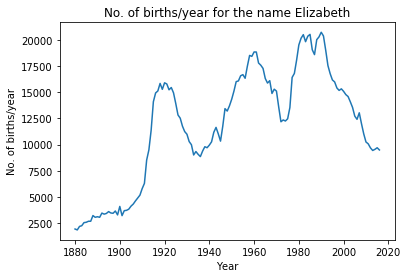

Maximum No. of births with the name Deneen = 1604


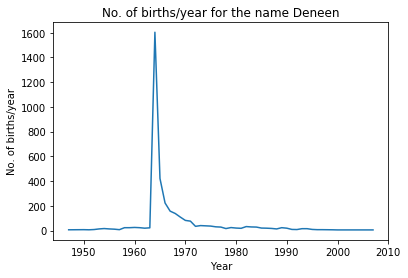

In [7]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
  grp = bnames[(bnames.name==name) & (bnames.sex==sex)].groupby('year').sum()
  plt.plot(grp)
  plt.xlabel('Year')
  plt.ylabel('No. of births/year')
  plt.title('No. of births/year for the name ' + name)
  print('Maximum No. of births with the name ' + name + ' = {}'.format(grp.max()[0]))
  plt.show()
  return

# Plot trends for Elizabeth and Deneen 
plot_trends('Elizabeth','F')
plot_trends('Deneen','F')

# How many times did these female names peak?
num_peaks_elizabeth = 3
num_peaks_deneen    = 1

In [8]:
%%nose
def test_peaks_elizabeth():
    """The name Elizabeth peaks 3 times."""
    assert num_peaks_elizabeth == 3, \
      "The name Elizabeth peaks 3 times"
    
def test_peaks_deneen():
    """The name Deneen peaks 1 time."""
    assert num_peaks_deneen == 1, \
      "The name Deneen peaks only once"

ERROR:root:Cell magic `%%nose` not found.


## 5. Trendy vs. Stable Names
<p>Based on the plots we created earlier, we can see that <strong>Elizabeth</strong> is a fairly stable name, while <strong>Deneen</strong> is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. </p>
<p>There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name <code>Joe</code> had the proportions <code>0.1, 0.2, 0.1, 0.1</code>, then the trendiness measure would be <code>0.2/(0.1 + 0.2 + 0.1 + 0.1)</code> which equals <code>0.5</code>.</p>
<p>Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.</p>

In [9]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
top10_trendy_names = bnames2.groupby(['name','sex'])['births'].sum().reset_index()
top10_trendy_names['max'] = (bnames2.groupby(['name','sex'])['births'].max().reset_index())['births']
top10_trendy_names['trendiness'] = top10_trendy_names['max'] / top10_trendy_names['births']
top10_trendy_names.columns=(['name','sex','total','max','trendiness'])
top10_trendy_names = top10_trendy_names[top10_trendy_names.total >= 1000].sort('trendiness',ascending=False).head(10)
top10_trendy_names

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
%%nose
def test_top10_trendy_names_exists():
    """top10_trendy_names is defined"""
    assert 'top10_trendy_names' in globals(), \
      "You should have defined a variable namedtop10_trendy_names."
def test_top10_trendy_df():
    """top10_trendy_names is a dataframe with 10 rows and 5 columns."""
    assert top10_trendy_names.shape == (10, 5), \
      "Your data frame, top10_trendy_names, should have 10 rows and 5 columns."

def test_top10_trendy_df_colnames():
    """top10_trendy_names has column names: name, sex, births, max and trendiness"""
    assert all(name in top10_trendy_names for name in ['name', 'sex', 'total', 'max', 'trendiness']), \
       "Your data frame, top10_trendy_names, should have column names: name, sex, births, max and trendiness"

def test_top10_trendy_df_contains_female_names():
    """top10_trendy_names has the follwing female names: Royalty, Kizzy, Aitana, Deneen, Moesha, Marely, Tennille, Kadijah"""
    target_names = ['Royalty', 'Kizzy', 'Aitana', 'Deneen', 'Moesha', 'Marely', 'Tennille', 'Kadijah']
    assert set(target_names).issubset(top10_trendy_names['name']), \
      "Your data frame, top10_trendy_names, should have female names: Royalty, Kizzy, Aitana, Deneen, Moesha, Marely, Tennille, Kadijah."

def test_top10_trendy_df_contains_male_names():
    """top10_trendy_names has the following male names: Christop, Kanye"""
    target_names = ['Christop', 'Kanye']
    assert set(target_names).issubset(top10_trendy_names['name']), \
      "Your data frame, top10_trendy_names, should have male names: Christop, Kanye"

## 6. Bring in Mortality Data
<p>So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the <a href="https://www.ssa.gov/">SSA</a> provides detailed <a href="https://www.ssa.gov/oact/STATS/table4c6.html">actuarial life tables</a> by birth cohorts.</p>
<table>
<thead>
<tr>
<th style="text-align:right;">year</th>
<th style="text-align:right;">age</th>
<th style="text-align:right;">qx</th>
<th style="text-align:right;">lx</th>
<th style="text-align:right;">dx</th>
<th style="text-align:right;">Lx</th>
<th style="text-align:right;">Tx</th>
<th style="text-align:right;">ex</th>
<th style="text-align:left;">sex</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">39</td>
<td style="text-align:right;">0.00283</td>
<td style="text-align:right;">78275</td>
<td style="text-align:right;">222</td>
<td style="text-align:right;">78164</td>
<td style="text-align:right;">3129636</td>
<td style="text-align:right;">39.98</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">40</td>
<td style="text-align:right;">0.00297</td>
<td style="text-align:right;">78053</td>
<td style="text-align:right;">232</td>
<td style="text-align:right;">77937</td>
<td style="text-align:right;">3051472</td>
<td style="text-align:right;">39.09</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">41</td>
<td style="text-align:right;">0.00318</td>
<td style="text-align:right;">77821</td>
<td style="text-align:right;">248</td>
<td style="text-align:right;">77697</td>
<td style="text-align:right;">2973535</td>
<td style="text-align:right;">38.21</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">42</td>
<td style="text-align:right;">0.00332</td>
<td style="text-align:right;">77573</td>
<td style="text-align:right;">257</td>
<td style="text-align:right;">77444</td>
<td style="text-align:right;">2895838</td>
<td style="text-align:right;">37.33</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">43</td>
<td style="text-align:right;">0.00346</td>
<td style="text-align:right;">77316</td>
<td style="text-align:right;">268</td>
<td style="text-align:right;">77182</td>
<td style="text-align:right;">2818394</td>
<td style="text-align:right;">36.45</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">44</td>
<td style="text-align:right;">0.00351</td>
<td style="text-align:right;">77048</td>
<td style="text-align:right;">270</td>
<td style="text-align:right;">76913</td>
<td style="text-align:right;">2741212</td>
<td style="text-align:right;">35.58</td>
<td style="text-align:left;">F</td>
</tr>
</tbody>
</table>
<p>You can read the <a href="https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html">documentation for the lifetables</a> to understand what the different columns mean. The key column of interest to us is <code>lx</code>, which provides the number of people born in a <code>year</code> who live upto a given <code>age</code>. The probability of being alive can be derived as <code>lx</code> by 100,000. </p>
<p>Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" </p>
<p>Let us use this data and plot it to get a sense of the mortality distribution!</p>

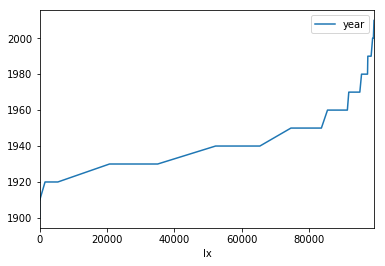

In [10]:
# Read lifetables from datasets/lifetables.csv
lifetables = pd.read_csv('datasets/lifetables.csv')

# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[(lifetables.year+lifetables.age)==2016]

# Plot the mortality distribution: year vs. lx
lifetables_2016.plot('lx','year');

In [11]:
%%nose
def test_lifetables_2016_exists():
    """lifetables_2016 is defined"""
    assert 'lifetables_2016' in globals(), \
      "You should have defined a variable named lifetables_2016."
def test_lifetables_2016_df():
    """Output is a DataFrame with 24 rows and 9 columns."""
    assert lifetables_2016.shape == (24, 9), \
      "Your DataFrame, lifetables_2016, should have 24 rows and 9 columns."

def test_lifetables_2016_df_colnames():
    """Output has column names: year, age, qx, lx, dx, Lx, Tx, ex, sex"""
    assert all(name in lifetables_2016 for name in ['year', 'age', 'qx', 'lx', 'dx', 'Lx', 'Tx', 'ex', 'sex']), \
      "Your DataFrame, lifetables_2016, should have columns named: year, age, qx, lx, dx, Lx, Tx, ex, sex."

def test_lifetables_2016_df_year_plus_age():
    """Output has the year + age = 2016"""
    assert all(lifetables_2016.year + lifetables_2016.age - 2016 == 0), \
      "The `year` column and `age` column in `lifetables_2016` should sum up to 2016."

ERROR:root:Cell magic `%%nose` not found.


## 7. Smoothen the Curve!
<p>We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of <code>lx</code>, between the years <code>1900</code> and <code>2016</code>.</p>

In [12]:
# Create smoothened lifetable_2016_s by interpolating values of lx
ind = [i for i in range(1900,2016)]

f = lifetables_2016[lifetables_2016.sex=='F'][['lx','sex','year']]
f = f.set_index('year').reindex(ind).interpolate().ffill()

m = lifetables_2016[lifetables_2016.sex=='M'][['lx','sex','year']]
m = m.set_index('year').reindex(ind).interpolate().ffill()

lifetable_2016_s = f.append(m).reset_index()
lifetable_2016_s.head()

,year,lx,sex
0,1900,0.0,F
1,1901,6.1,F
2,1902,12.2,F
3,1903,18.3,F
4,1904,24.4,F


In [13]:
%%nose
def test_lifetable_2016_s_exists():
    """lifetable_2016_s is defined"""
    assert 'lifetable_2016_s' in globals(), \
      "You should have defined a variable named lifetable_2016_s."
def test_lifetables_2016_s_df():
    """lifetable_2016_s is a dataframe with 232 rows and 3 columns."""
    assert lifetable_2016_s.shape == (232, 3), \
      "Your DataFrame, lifetable_2016_s, should have 232 rows and 3 columns."

def test_lifetable_2016_s_df_colnames():
    """lifetable_2016_s has column names: year, lx, sex"""
    assert all(name in lifetable_2016_s for name in ['year', 'lx', 'sex']), \
      "Your DataFrame, lifetable_2016_s, should have columns named: year, lx, sex."

ERROR:root:Cell magic `%%nose` not found.


## 8. Distribution of People Alive by Name
<p>Now that we have all the required data, we need a few helper functions to help us with our analysis. </p>
<p>The first function we will write is <code>get_data</code>,which takes <code>name</code> and <code>sex</code> as inputs and returns a data frame with the distribution of number of births and number of people alive by year.</p>
<p>The second function is <code>plot_name</code> which accepts the same arguments as <code>get_data</code>, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.</p>
<p>Using these functions, we will plot the distribution of births for boys named <strong>Joseph</strong> and girls named <strong>Brittany</strong>.</p>

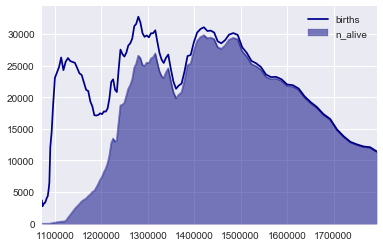

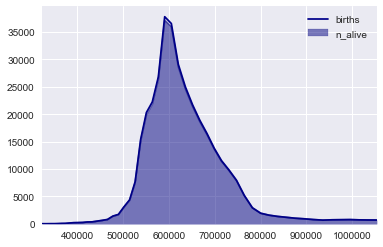

In [14]:
import seaborn as sns
sns.set()

def get_data(name, sex):
    m = pd.merge(lifetable_2016_s,bnames,on=['year','sex'])
    m['n_alive'] = m['lx'] * m['births'] / 100000
    return m[(m.name==name)&(m.sex==sex)]

def plot_data(name, sex):
    m = get_data(name,sex)
    ax=plt.axes()
    m[['births']].plot(ax=ax,color='darkblue')
    m[['n_alive']].plot(kind='area',ax=ax,alpha=0.5,color='navy')
    plt.show();
    return 
    
# Plot the distribution of births and number alive for Joseph and Brittany
plot_data('Joseph','M')
plot_data('Brittany','F')

In [15]:
%%nose
joseph = get_data('Joseph', 'M')
def test_joseph_df():
    """get_data('Joseph', 'M') is a dataframe with 116 rows and 6 columns."""
    assert joseph.shape == (116, 6), \
      "Running  get_data('Joseph', 'M') should return a data frame with 116 rows and 6 columns."

def test_joseph_df_colnames():
    """get_data('Joseph', 'M') has column names: name, sex, births, year, lx, n_alive"""
    assert all(name in lifetable_2016_s for name in ['year', 'lx', 'sex']), \
      "Running  get_data('Joseph', 'M') should return a data frame with column names: name, sex, births, year, lx, n_alive"

ERROR:root:Cell magic `%%nose` not found.


## 9. Estimate Age
<p>In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named <strong>Gertrude</strong>. Any guesses on how old a person with this name is? How about a male named <strong>William</strong>?</p>

In [16]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
def estimate_age(name, sex):
    data = get_data(name, sex) 
    qs = [0.75, 0.5, 0.25] 
    quantiles = [2016 - int(quantile(data.year, data.n_alive, q)) for q in qs] 
    result = dict(zip(['q25', 'q50', 'q75'], quantiles)) 
    result['p_alive'] = round(data.n_alive.sum()/data.births.sum()*100, 2) 
    result['sex'] = sex 
    result['name'] = name 
    return pd.Series(result)

# Estimate the age of Gertrude
print(estimate_age('Gertrude','F'))
print(estimate_age('William','M'))

ModuleNotFoundError: No module named 'wquantiles'

In [ ]:
%%nose
gertrude = estimate_age('Gertrude', 'F')
def test_gertrude_names():
    """Series has indices name, p_alive, q25, q50 and q75"""
    expected_names = ['name', 'p_alive', 'q25', 'q50', 'q75']
    assert all(name in gertrude.index.values for name in expected_names), \
      "Your function `estimate_age` should return a series with names: name, p_alive, q25, q50 and q75"

def test_gertrude_q50():
    """50th Percentile of age for Gertrude is between 75 and 85"""
    assert ((75 < gertrude['q50']) and (gertrude['q50'] < 85)), \
      "The estimated median age for the name Gertrude should be between 75 and 85."

## 10. Median Age of Top 10 Female Names
<p>In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!</p>

In [71]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive
import numpy as np
top_10_female_names = bnames.\
  groupby(['name', 'sex'], as_index = False).\
  agg({'births': np.sum}).\
  sort_values('births', ascending = False).\
  query('sex == "F"').\
  head(10).\
  reset_index(drop = True)
estimates = pd.concat([estimate_age(name, 'F') for name in top_10_female_names.name], axis = 1)
median_ages = estimates.T.sort_values('q50').reset_index(drop = True)

In [72]:
%%nose
def test_median_ages_exists():
    """median_ages is defined"""
    assert 'median_ages' in globals(), \
      "You should have a variable named median_ages defined."
def test_median_ages_df():
    """median_ages is a dataframe with 10 rows and 6 columns."""
    assert median_ages.shape == (10, 6), \
      "Your DataFrame, median_ages, should have 10 rows and 6 columns"

def test_median_ages_df_colnames():
    """median_ages has column names: name, p_alive, q25, q50, q75 and sex"""
    assert all(name in median_ages for name in ['name', 'p_alive', 'q25', 'q50', 'q75', 'sex']), \
      "Your DataFrame, median_ages, should have columns named: name, p_alive, q25, q50, q75 and sex"

3/3 tests passed
